In [48]:
import pandas
from sklearn.datasets import make_blobs
from sklearn.preprocessing import MinMaxScaler
from sklearn import svm,metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot 
import numpy 
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.datasets import make_moons
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
X,y   = make_blobs(n_samples=1000,   n_features=2,   centers=2,   cluster_std=1.0, center_box=(-10.0, 10.0))

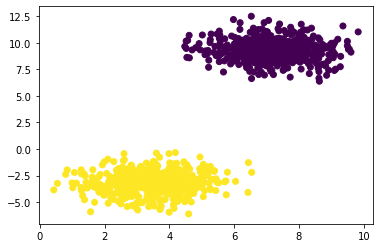

In [3]:
pyplot.scatter(X[:,0],X[:,1],c=y)


In [4]:
normalization= MinMaxScaler().fit_transform(X)
print(normalization)



[[0.31397891 0.12717436]
 [0.44232838 0.14396675]
 [0.54569015 0.90421679]
 ...
 [0.44583593 0.16092416]
 [0.32948248 0.11584376]
 [0.43476758 0.87443508]]


In [5]:
classifieur= svm.LinearSVC(C=10000)


In [6]:
classifieur.fit(X, y)

LinearSVC(C=10000)

In [7]:
ypred=classifieur.predict(X)

In [8]:
taux_error = 1 - metrics.accuracy_score (ypred, y)
print("Train error: %.3f" % taux_error)

Train error: 0.000


In [9]:
metrics.confusion_matrix(y, ypred)

array([[500,   0],
       [  0, 500]], dtype=int64)

In [10]:
# Créer un mesh
h = .02 # Espacement du mesh
x_min, x_max = X[:, 0].min()*1.1, X[:, 0].max()*1.1
y_min, y_max = X[:, 1].min()*1.1, X[:, 1].max()*1.1
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h), 
numpy.arange(y_min, y_max, h))


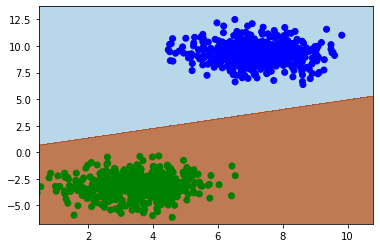

In [11]:
model = svm.LinearSVC(C=10000)
model.fit(X,y)
Y = model.predict(numpy.c_[xx.ravel(), yy.ravel()])
Y = Y.reshape(xx.shape)
colors = numpy.array([x for x in "bgrcmyk"])
pyplot.contourf(xx, yy, Y, cmap=pyplot.cm.Paired, alpha=0.8)
pyplot.scatter(X[:, 0], X[:, 1], cmap=pyplot.cm.Paired, color=colors[y].tolist())
pyplot.xlim(xx.min(), xx.max())
pyplot.ylim(yy.min(), yy.max())
pyplot.show()

Les deux execution ont parfaitement separer les deux classes, 
aucune erreur n a été repertorié et le temps d execution est tres rapide
Le SVM est un classifieur à marge maximal donc il trouve toujour la même separatrice pour separer les classes c'est pourquoi après repetition on observe qu'on a toujours la même frontière de decision  
Elle a toujour la "meilleur" separatrice pour separer les donnes en classe alors que le RNN en a plusieurs et il faut choisir la meilleur
On utiise ici la valeur du critère de pénalisation (C) est élevé,et on a un taux d'érreur null, ce qui parait logique, car C détermine le poids des érreurs.





## Parti 2 SVM Multicouche 


In [12]:
X,y   = make_blobs(n_samples=10000,   n_features=2,   centers=2,  random_state=200, cluster_std=3.0, center_box=(-10.0, 10.0))

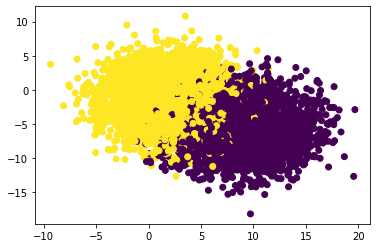

In [13]:
pyplot.scatter(X[:,0],X[:,1],c=y)

In [14]:
normalization= MinMaxScaler().fit_transform(X)

In [91]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, test_size=0.3,stratify=y )
#split_base = StratifiedShuffleSplit(n_splits=5, train_size=0.7, test_size=0.3, random_state=0)
#for train_index, test_index in split_base.split(X, y):
 #   X_train, X_test = X[train_index], X[test_index]
  #  y_train, y_test = y[train_index], y[test_index]

On separe en base de test et d'apprentissage afin d'eviter l'overfitting et que notre modèle peut être etendu en test
La base de test permet d'estimer le niveau de formation d'un modèle
La base d'apprentissage permet d'entraînez un modèle en associant l’entrée aux résultats attendus.
La séparation de la base permet de vérifier 

In [94]:
taux_train=[]
C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
for C in C_2d_range:
    for gamma in gamma_2d_range:
        rbfsvm = svm.SVC(C=C, gamma=gamma)
        rbfsvm.fit(X_train, y_train)
        ypred=rbfsvm.predict(X_train)
        taux_error = 1 - metrics.accuracy_score (ypred, y_train)
        #taux_error=1-rbfsvm.score(ypred,y_test)
    taux_train.append(taux_error)
print(taux_train)


[0.014285714285714235, 0.02857142857142858, 0.0]


In [95]:
taux_test=[]
C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
for C in C_2d_range:
    for gamma in gamma_2d_range:
        rbfsvm = svm.SVC(C=C, gamma=gamma)
        rbfsvm.fit(X_test, y_test)
        ypred=rbfsvm.predict(X_test)
        taux_error = 1 - metrics.accuracy_score (ypred, y_test)
        #taux_error=1-rbfsvm.score(ypred,y_test)
    taux_test.append(taux_error)
print(taux_test)

[0.0, 0.0, 0.0]


le classifieur interprete convenablement les donnée car les performances sont tout à fait correct car son taux d erreur d’apprentissage est plus eleve que celui de test 
Plus C est grand plus le taux d'erreur diminue
Le SVM à marge souple est performent pour separer également les données non linéairement séparables 

In [ ]:
Resaux de neuronne a une complexité plus élevée que le SVM
la quantité de donnée d apprentissage d un SVM peut être faible pour pouvoir predir alors que le RNN à besoin d un grand nbr de donnee
Cela induit que le SVM est beaucoup plus rapide que le RNN en terme de temps d execution et est moin coûteux 

# Partie 2 C

In [31]:
X,y= make_moons(n_samples=100,noise=0.1)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, test_size=0.3)

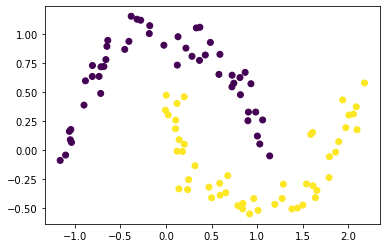

In [32]:
pyplot.scatter(X[:,0],X[:,1],c=y)

In [38]:
#train

listOfGamma = list(numpy.arange(1,10,1))
tab_error = []
vector_suport = []
for g in listOfGamma:
    gaussianSVM = svm.SVC(kernel='rbf',C=10,gamma=g)
    gaussianSVM.fit(X_train, y_train)
    ypred = gaussianSVM.predict(X_train)
    error = 1 - metrics.accuracy_score (ypred, y_train) 
    tab_error.append(error)
    vector_suport.append(len(gaussianSVM.support_vectors_))
print(tab_error) 
print(vector_suport)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[9, 12, 16, 19, 24, 26, 27, 30, 31]


In [46]:
#test

listOfGamma = list(numpy.arange(1,10,1))
tab_error = []
vector_suport = []
for g in listOfGamma:
    gaussianSVM = svm.SVC(kernel='rbf',C=10,gamma=g)
    gaussianSVM.fit(X_test, y_test)
    ypred = gaussianSVM.predict(X_test)
    error = 1 - metrics.accuracy_score (ypred, y_test) 
    tab_error.append(error)
    vector_suport.append(len(gaussianSVM.support_vectors_))
print(tab_error) 
print(vector_suport)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[10, 11, 12, 17, 17, 19, 21, 23, 25]


J'ai 100 exemples dans mon jeux de données que j'ai séparé (70 entrainement et 30 test)
Donc j'ai casiment autant de vecteur support que d'exemples sur la base de test. 

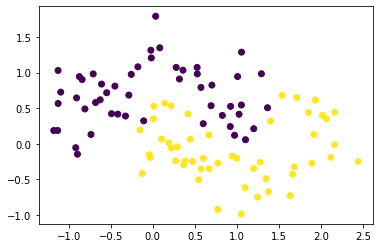

In [47]:
X,y= make_moons(n_samples=100,noise=0.3)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, train_size=0.7, test_size=0.3)
pyplot.scatter(X[:,0],X[:,1],c=y)

In [56]:
#train

listOfGamma = list(numpy.arange(1,5,1))
tab_error = []
vector_suport = []
for g in listOfGamma:
    gaussianSVM = svm.SVC(kernel='rbf',C=10,gamma=g)
    gaussianSVM.fit(X_train, y_train)
    ypred = gaussianSVM.predict(X_train)
    error = 1 - metrics.accuracy_score (ypred, y_train) 
    tab_error.append(error)
    vector_suport.append(len(gaussianSVM.support_vectors_))
print(tab_error) 
print(vector_suport)

[0.014285714285714235, 0.0, 0.0, 0.0]
[15, 16, 19, 26]


In [54]:
#test

listOfGamma = list(numpy.arange(1,5,1))
tab_error = []
vector_suport = []
for g in listOfGamma:
    gaussianSVM = svm.SVC(kernel='rbf',C=10,gamma=g)
    gaussianSVM.fit(X_test, y_test)
    ypred = gaussianSVM.predict(X_test)
    error = 1 - metrics.accuracy_score (ypred, y_test) 
    tab_error.append(error)
    vector_suport.append(len(gaussianSVM.support_vectors_))
print(tab_error) 
print(vector_suport)

[0.09999999999999998, 0.033333333333333326, 0.033333333333333326, 0.033333333333333326]
[11, 14, 17, 20]


On observe que le taux d'erreur diminue en fonction que gamma augmente 

In [88]:
#train       
taux_train=[]
C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        rbfsvm = svm.SVC(kernel='rbf', C=C, gamma=gamma)
        rbfsvm.fit(X_train, y_train)
        classifiers.append((C, gamma, rbfsvm))
        ypred = rbfsvm.predict(X_train)
        taux_error = 1 - metrics.accuracy_score (ypred, y_train)
        #taux_error=1-rbfsvm.score(y_test,ypred)
        
        taux_train.append(taux_error)
print(taux_train)
print(len(rbfsvm.support_vectors_))


[0.48571428571428577, 0.48571428571428577, 0.48571428571428577, 0.17142857142857137, 0.05714285714285716, 0.0, 0.08571428571428574, 0.0, 0.0]
42


In [89]:
#test       
taux_test=[]
C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
classifiers = []
for C in C_2d_range:
    for gamma in gamma_2d_range:
        rbfsvm = svm.SVC(kernel='rbf', C=C, gamma=gamma)
        rbfsvm.fit(X_test, y_test)
        classifiers.append((C, gamma, rbfsvm))
        ypred = rbfsvm.predict(X_test)
        taux_error = 1 - metrics.accuracy_score (ypred, y_test)
        #taux_error=1-rbfsvm.score(y_test,ypred)
        
        taux_test.append(taux_error)
print(taux_test)
print(len(rbfsvm.support_vectors_))

[0.4666666666666667, 0.4666666666666667, 0.4666666666666667, 0.16666666666666663, 0.1333333333333333, 0.033333333333333326, 0.06666666666666665, 0.033333333333333326, 0.0]
27


In [14]:
#5 cross validation
C_2d_range = [1e-2, 1, 1e2]
gamma_2d_range = [1e-1, 1, 1e1]
for C in C_2d_range:
    for gamma in gamma_2d_range:
        rbfsvm = svm.SVC(kernel='rbf', C=C, gamma=gamma)
        scores = cross_val_score(rbfsvm, X, y, cv=5)
    #taux_test.append(scores)
print(scores.mean())

[0.76666667 0.7        0.7        0.83333333 0.83333333]
[1.         0.9        0.86666667 0.96666667 0.96666667]
[1.         0.9        0.86666667 0.93333333 0.96666667]
0.9333333333333333


La moyenne obtenu avec cross validation couple avec le processus en recherche en grill laisse pensé que l'algorithme a une très bonne performance 

In [46]:
data = load_iris()
len_width = [2, 3]
X = data.data[:,len_width] 
y = data.target
#sepal.length= X[:, 2] 
#sepal.width= X[:, 3]
df = pd.DataFrame(data.data, columns=data.feature_names)
X_train,  X_test,  y_train,  y_test =  model_selection.train_test_split(X,  y,  train_size=0.7,  test_size=0.3, stratify=y)

#varier max depth en train
min_samples_split=[]
for mss in [ 2, 3, 4, 5, 6, 7, 8]:
    clf = DecisionTreeClassifier(min_samples_split = mss)
    clf = clf.fit(X_train, y_train)
    ypred=clf.predict(X_train)
    taux_error = 1 - metrics.accuracy_score (ypred, y_train)
    min_samples_split.append(taux_error)
print("In train, after variation of mss "+str(min_samples_split))


#varier max depth en train
maxdepth=[]
for mdepth in [ 2, 3, 4, 5, 6, 7,8]:
    clf = DecisionTreeClassifier(max_depth = mdepth)
    clf = clf.fit(X_train, y_train)
    ypred=clf.predict(X_train)
    taux_error = 1 - metrics.accuracy_score (ypred, y_train)
    maxdepth.append(taux_error)
print("in train, after variation of max depth "+str(maxdepth))

#varier max depth en test
min_samples_split=[]
for mss in [ 2, 3, 4, 5, 6, 7, 8]:
    clf = DecisionTreeClassifier(min_samples_split = mss)
    clf = clf.fit(X_test, y_test)
    ypred=clf.predict(X_test)
    taux_error = 1 - metrics.accuracy_score (ypred, y_test)
    min_samples_split.append(taux_error)
print("In test, after variation of mss "+str(min_samples_split))


#varier max depth en test
maxdepth=[]
for mdepth in [ 2, 3, 4, 5, 6, 7,8]:
    clf = DecisionTreeClassifier(max_depth = mdepth)
    clf = clf.fit(X_test, y_test)
    ypred=clf.predict(X_test)
    taux_error = 1 - metrics.accuracy_score (ypred, y_test)
    maxdepth.append(taux_error)
print("in test, after variation of max depth "+str(maxdepth))

In train, after variation of mss [0.00952380952380949, 0.01904761904761909, 0.01904761904761909, 0.01904761904761909, 0.01904761904761909, 0.01904761904761909, 0.01904761904761909]
in train, after variation of max depth [0.02857142857142858, 0.01904761904761909, 0.01904761904761909, 0.00952380952380949, 0.00952380952380949, 0.00952380952380949, 0.00952380952380949]
In test, after variation of mss [0.0, 0.022222222222222254, 0.022222222222222254, 0.022222222222222254, 0.022222222222222254, 0.022222222222222254, 0.022222222222222254]
in test, after variation of max depth [0.022222222222222254, 0.022222222222222254, 0.0, 0.0, 0.0, 0.0, 0.0]


In [49]:
X_train,  X_test,  y_train,  y_test =  model_selection.train_test_split(X,  y,  train_size=0.7,  test_size=0.3, stratify=y)

pgrid = {"max_depth": [1, 2, 3, 4, 5, 6, 7],
      "min_samples_split": [2, 3, 5, 10, 15, 20]}
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid=pgrid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_.score(X_test, y_test))

0.9555555555555556


In [ ]:
gaussianSVM.fit(X, y)
ypred = gaussianSVM.predict(X)
err_train = 1 - metrics.accuracy_score (ypred, y) 
print("Train error: %.3f" % err_train)

Y = gaussianSVM.predict(numpy.c_[xx.ravel(), yy.ravel()])
Y = Y.reshape(xx.shape)
colors = numpy.array([x for x in "bgrcmyk"])
pyplot.contourf(xx, yy, Y, cmap=pyplot.cm.Paired, alpha=0.8)
pyplot.scatter(X[:, 0], X[:, 1], cmap=pyplot.cm.Paired, color=colors[y].tolist())
pyplot.xlim(xx.min(), xx.max())
pyplot.ylim(yy.min(), yy.max())
pyplot.show()

print(metrics.confusion_matrix(y, ypred))
print(len(gaussianSVM.support_vectors_))


In [18]:
# Créer un mesh
h = .02 # Espacement du mesh
x_min, x_max = X[:, 0].min()*1.1, X[:, 0].max()*1.1
y_min, y_max = X[:, 1].min()*1.1, X[:, 1].max()*1.1
xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, h), 
numpy.arange(y_min, y_max, h))